### Machine learning tasks in images

In [1]:
%matplotlib inline

import glob
import scipy.stats
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

There are three different types of machine learning techniques generally used in images - 
<li>Image Classification</li>
<li>Image Localization / Object detection</li>
<li>Image Segmentation</li>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Image classification

chest_x_ray_1.PNG

### Image localization

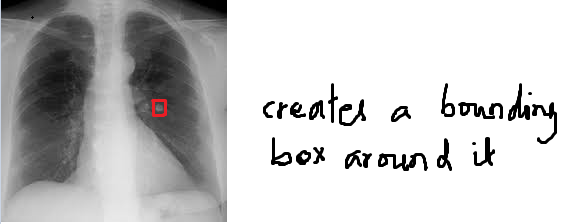

### Image segmentation

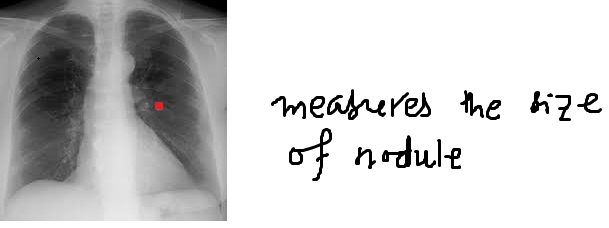

### ML vs DL

Machine Learning Approach

chest_x_ray_4.PNG

<font color='red'>How to generate features from images?</font>

### Otsu's method

It is used to perform automatic image thresholding. In the simplest form, the algorithm returns a single intensity threshold that separate pixels into two classes, foreground and background. This threshold is determined by minimizing intra-class intensity variance, or equivalently, by maximizing inter-class variance. This technique helps in doing image segmentation which in turn can be used in image classification.

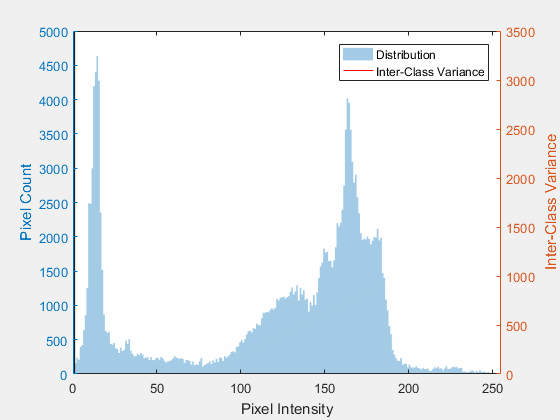

In [3]:
dense = io.imread('/content/drive/My Drive/Analytics Vidhya Computer Vision Workshop/images/mamography/all-mias/mdb003.pgm')
fatty = io.imread('/content/drive/My Drive/Analytics Vidhya Computer Vision Workshop/images/mamography/all-mias/mdb005.pgm')

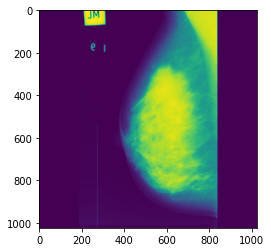

In [4]:
plt.imshow(dense);

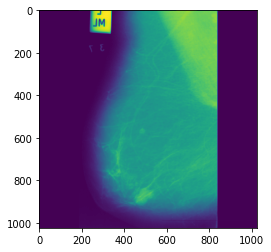

In [5]:
plt.imshow(fatty);

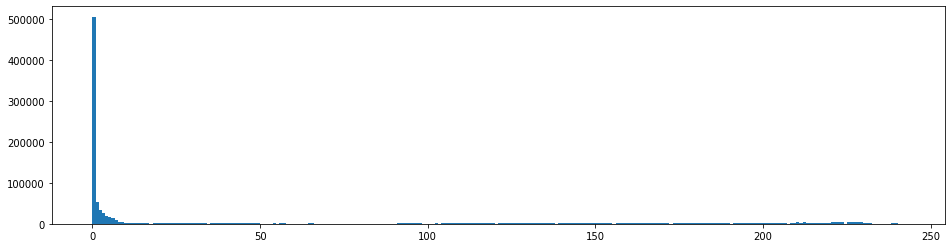

In [6]:
fig = plt.figure(figsize=(16, 4))
plt.hist(dense.ravel(),bins=256);

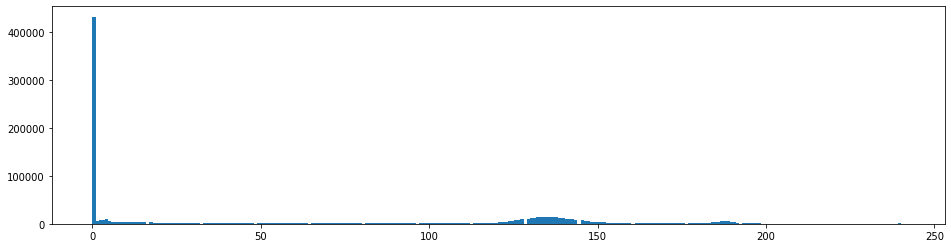

In [7]:
fig = plt.figure(figsize=(16, 4))
plt.hist(fatty.ravel(),bins=256);

### Identifying threshold intensity for removing background from the images

In [8]:
thresh = 50

dense_bin = (dense > thresh)
fatty_bin = (fatty > thresh)

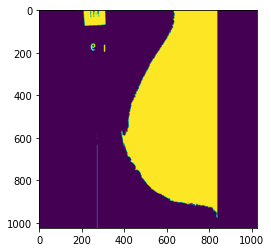

In [9]:
plt.imshow(dense_bin);

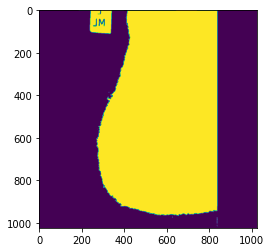

In [10]:
plt.imshow(fatty_bin);

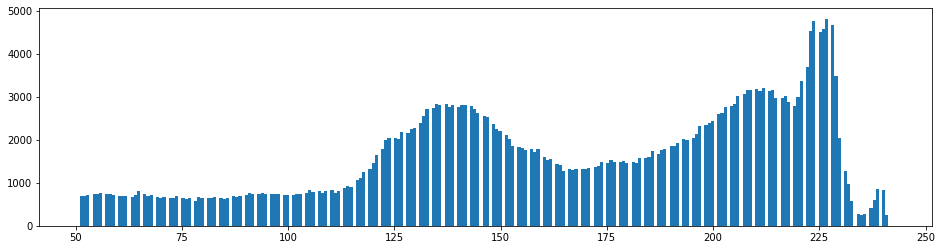

In [11]:
fig = plt.figure(figsize=(16, 4))
plt.hist(dense[dense_bin], bins=256);

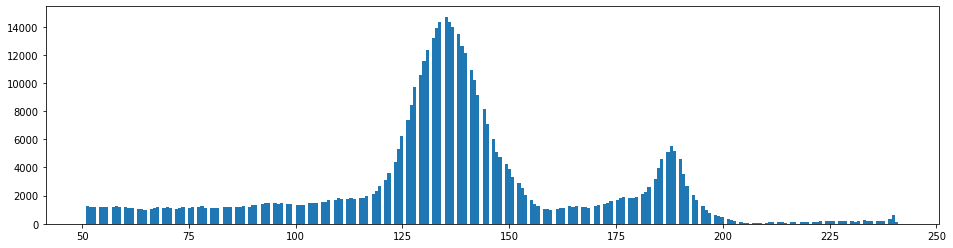

In [12]:
fig = plt.figure(figsize=(16, 4))
plt.hist(fatty[fatty_bin], bins=256);

### Simple ML model by taking mean pixel intensity as feature

In [13]:
thresh = 50

fatty_imgs = glob.glob("/content/drive/My Drive/Analytics Vidhya Computer Vision Workshop/images/mamography/fatty/*")
dense_imgs = glob.glob("/content/drive/My Drive/Analytics Vidhya Computer Vision Workshop/images/mamography/dense/*")

In [14]:
fatty_intensities = []

for i in fatty_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    fatty_intensities.extend(img[img_mask].tolist())

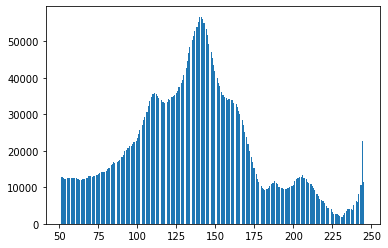

In [15]:
plt.hist(fatty_intensities,bins=256);

In [16]:
dense_intensities = []

for i in dense_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    dense_intensities.extend(img[img_mask].tolist())

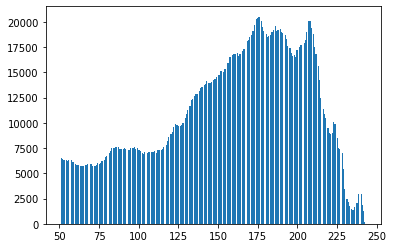

In [17]:
plt.hist(dense_intensities,bins=256);

In [18]:
scipy.stats.mode(fatty_intensities)[0][0]

140

In [19]:
scipy.stats.mode(dense_intensities)[0][0]

176

In [20]:
for i in fatty_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    #print('printing mode of fatty images', scipy.stats.mode(img[img_mask])[0][0])
    
    fatty_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(fatty_intensities)[0][0]
    dense_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(dense_intensities)[0][0]
    
    if (np.abs(fatty_delta) < np.abs(dense_delta)):
        print("Fatty")
    else:
        print("Dense")

Fatty
Dense
Dense
Dense
Fatty
Fatty
Fatty
Fatty
Fatty
Fatty


We got 70% accuracy here 

In [21]:
for i in dense_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    
    fatty_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(fatty_intensities)[0][0]
    dense_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(dense_intensities)[0][0]
    
    if (np.abs(fatty_delta) < np.abs(dense_delta)):
        print("Fatty")
    else:
        print("Dense")

Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense


We got 100% accuracy here, just using a very simple technique.

### How it happens in deep learning

Deep Learning Approach

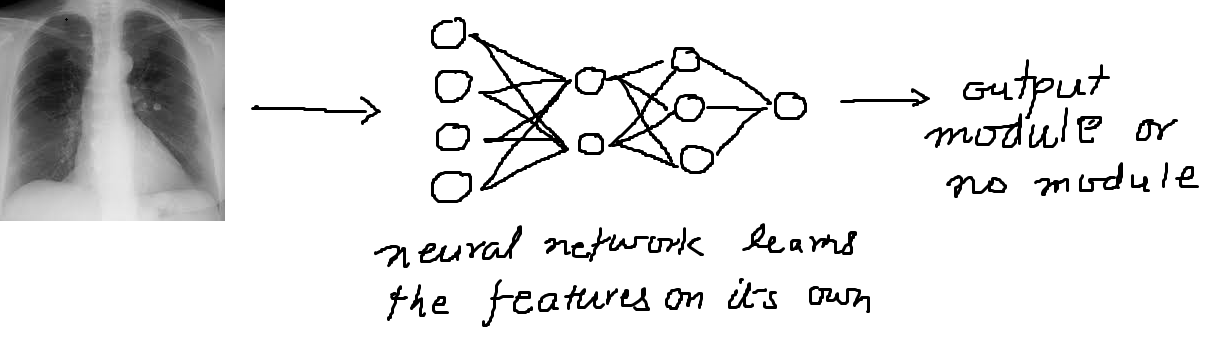